# Load the Data, Convert '-' to nan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('nyc-rolling-sales.csv',na_values=[' -  '])
df.shape

(84548, 22)

In [4]:
df.dtypes

Unnamed: 0                          int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                            int64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                        float64
SALE DATE                          object
dtype: object

# Data Types

## Drop Column

In [5]:
## empty
df['EASE-MENT'].unique()

array([' '], dtype=object)

In [6]:
df.drop('EASE-MENT', axis=1, inplace=True)

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## Change Column type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         84548 non-null  int64  
 1   NEIGHBORHOOD                    84548 non-null  object 
 2   BUILDING CLASS CATEGORY         84548 non-null  object 
 3   TAX CLASS AT PRESENT            84548 non-null  object 
 4   BLOCK                           84548 non-null  int64  
 5   LOT                             84548 non-null  int64  
 6   BUILDING CLASS AT PRESENT       84548 non-null  object 
 7   ADDRESS                         84548 non-null  object 
 8   APARTMENT NUMBER                84548 non-null  object 
 9   ZIP CODE                        84548 non-null  int64  
 10  RESIDENTIAL UNITS               84548 non-null  int64  
 11  COMMERCIAL UNITS                84548 non-null  int64  
 12  TOTAL UNITS                     

In [9]:
obj_cats = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
        'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'BUILDING CLASS AT TIME OF SALE']
for colname in obj_cats:
    df[colname] = df[colname].astype('category')

In [10]:
num_cats = ['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE',
            'TAX CLASS AT TIME OF SALE']
for colname in num_cats:
    df[colname] = df[colname].astype('category')  

In [11]:
numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  category
 1   NEIGHBORHOOD                    84548 non-null  category
 2   BUILDING CLASS CATEGORY         84548 non-null  category
 3   TAX CLASS AT PRESENT            84548 non-null  category
 4   BLOCK                           84548 non-null  category
 5   LOT                             84548 non-null  category
 6   BUILDING CLASS AT PRESENT       84548 non-null  category
 7   ADDRESS                         84548 non-null  category
 8   APARTMENT NUMBER                84548 non-null  category
 9   ZIP CODE                        84548 non-null  category
 10  RESIDENTIAL UNITS               84548 non-null  int64   
 11  COMMERCIAL UNITS                84548 non-null  int64   
 12  TOTAL UNITS       

In [13]:
# change dtype to date
df['SALE DATE']=pd.to_datetime(df['SALE DATE'])
df['SALE DATE'].dtype

dtype('<M8[ns]')

# Augment Data with Additional Columns

## Add building age column

In [14]:
#df = df.drop('BUILDING AGE', 1)
#Mathematical Operation to create New Column
df['BUILDING AGE'] = 2022 - df['YEAR BUILT'].astype(int, errors='ignore')

## Add building category column

In [15]:
df['BUILDING CATEGORY'] = np.where(df['BUILDING AGE']>=76,'Pre-War','Post-War')
df['BUILDING CATEGORY'] = df['BUILDING CATEGORY'].astype('category')

# Data Cleaning

## Change numerical indicators to str categories

In [16]:
df['BOROUGH']= df['BOROUGH'].astype(str)
df['BOROUGH']= df['BOROUGH'].replace({'1':"Manhattan", '2': 'Bronx', '3':'Brooklyn', '4':'Queens', '5':'Staten Island'})

In [17]:
df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING AGE,BUILDING CATEGORY
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,122,Pre-War
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,122,Pre-War
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,122,Pre-War
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,109,Pre-War
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,122,Pre-War


## Identify 0 values, replace some to nan

In [18]:
def zero_values_table(df):
    """
    Finds the number of 0 entries and its percentage with respect to each attributes
        in the DataFrame 'df'
    Args:
        DataFrame
    Returns:
        A table contains number of nulls, of 0s, % of 0s out of all entries, and total non null values.
    """
    check_table = []
    for i in df.columns:
        count_zeros = (df[i]==0).sum()
        percentage = 100 * (df[i]==0).sum() / len(df[i].index)
        count_values = df[i].notnull().sum()

        if count_zeros>0:
            check_table.append(
            {   'column name': i,
                'zero_val' : count_zeros,
                'zero_val_percent': percentage,
                'nonnull_values': count_values}
            )
    return pd.DataFrame(check_table)

In [19]:
zero_values_table(df)

,column name,zero_val,zero_val_percent,nonnull_values
0,ZIP CODE,982,1.161470,84548
1,RESIDENTIAL UNITS,24783,29.312343,84548
2,COMMERCIAL UNITS,79429,93.945451,84548
3,TOTAL UNITS,19762,23.373705,84548
4,LAND SQUARE FEET,10326,12.213181,58296
5,GROSS SQUARE FEET,11417,13.503572,56936
6,YEAR BUILT,6970,8.243838,84548
7,SALE PRICE,10228,12.097270,69987


In [20]:
lst = ['ZIP CODE','TOTAL UNITS','LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']
for i in df[lst]:
    df[i] = df[i].replace(0, np.nan)

In [21]:
zero_values_table(df)

,column name,zero_val,zero_val_percent,nonnull_values
0,RESIDENTIAL UNITS,24783,29.312343,84548
1,COMMERCIAL UNITS,79429,93.945451,84548


## Identify Missing Data

In [22]:
def missing_values_table(df):
    """
    Finds the number of null entries and its percentage with respect to each attributes
        in the DataFrame 'df'
    Args:
        DataFrame
    Returns:
        A table contains number of nulls, % of nulls out of all entries, and total non null values.
    """
    check_table = []
    for i in df.columns:
        count_nans = df[i].isnull().sum()
        count_values = df[i].notnull().sum()
        percentage = 100 * df[i].isnull().sum() / len(df[i].index)
        add = count_nans+count_values
        if count_nans>0:
            check_table.append(
            {   'column name': i,
                'mis_val' : count_nans,
                'mis_val_percent': percentage,
                'nonnull_values': count_values,
                'total_record': add}
            )
    return pd.DataFrame(check_table)

In [23]:
missing_values_table(df)

,column name,mis_val,mis_val_percent,nonnull_values,total_record
0,ZIP CODE,982,1.161470,83566,84548
1,TOTAL UNITS,19762,23.373705,64786,84548
2,LAND SQUARE FEET,36578,43.262999,47970,84548
3,GROSS SQUARE FEET,39029,46.161944,45519,84548
4,YEAR BUILT,6970,8.243838,77578,84548
5,SALE PRICE,24789,29.319440,59759,84548


## Deal with Missing Data

In [24]:
# drop whole row with NaN in 3 specified columns
df.dropna(subset=['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE'], inplace=True)

In [25]:
# reset index, because we dropped rows
df.reset_index(drop=True, inplace=True)

In [26]:
missing_values_table(df)

,column name,mis_val,mis_val_percent,nonnull_values,total_record
0,ZIP CODE,11,0.037518,29308,29319
1,TOTAL UNITS,38,0.129609,29281,29319


## Check and drop Outliers

### Visualization of numerical values outliers Using Scatter Plot

In [34]:
df.select_dtypes(['category']).columns

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'ADDRESS',
       'APARTMENT NUMBER', 'ZIP CODE', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'BUILDING CATEGORY'],
      dtype='object')

<AxesSubplot:xlabel='BUILDING AGE', ylabel='SALE PRICE'>

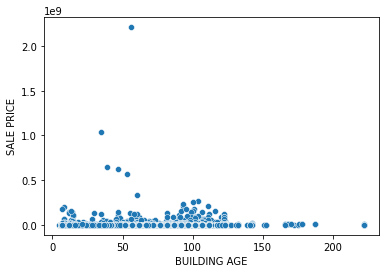

In [35]:
sns.scatterplot(data=df, x="BUILDING AGE", y="SALE PRICE")

<AxesSubplot:xlabel='BUILDING AGE', ylabel='SALE PRICE'>

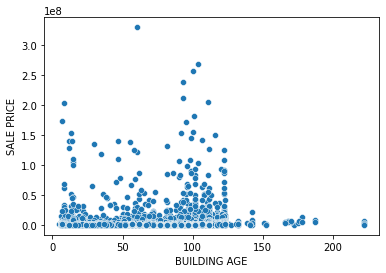

In [36]:
sns.scatterplot(data=df[(df['SALE PRICE']<500000000) 
                        & (df['SALE PRICE'] > 1000)], x="BUILDING AGE", y="SALE PRICE")


<AxesSubplot:xlabel='LAND SQUARE FEET', ylabel='GROSS SQUARE FEET'>

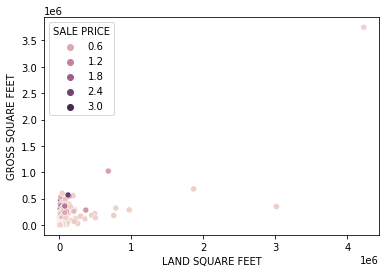

In [37]:
sns.scatterplot(data=df[(df['SALE PRICE']<500000000) 
                        & (df['SALE PRICE'] > 1000)], x="LAND SQUARE FEET", y="GROSS SQUARE FEET", hue = "SALE PRICE")

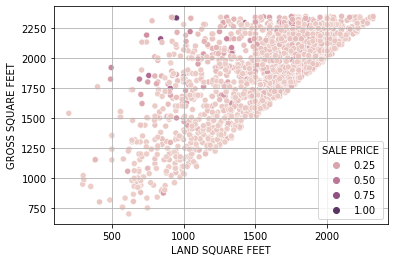

In [38]:
sns.scatterplot(data=df[(df['SALE PRICE']<500000000) & (df['SALE PRICE'] > 1000) 
                        & (df["LAND SQUARE FEET"]< df["GROSS SQUARE FEET"])
                        & (df["GROSS SQUARE FEET"]<2350)
                        & (df["GROSS SQUARE FEET"]>120)], x="LAND SQUARE FEET", y="GROSS SQUARE FEET", hue = "SALE PRICE")
plt.grid()

The Gross Square Feet is the total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building, including the land area and space within any building or structure on the property.

Graph Interpretation: 

The uphill pattern moving from left to right indicates there is a positive relationship between the GROSS SQUARE FEET and LAND SQUARE FEET attributes.

<AxesSubplot:xlabel='RESIDENTIAL UNITS', ylabel='COMMERCIAL UNITS'>

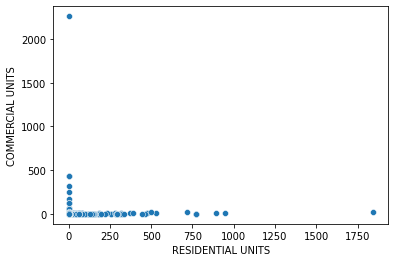

In [39]:
sns.scatterplot(data=df, x="RESIDENTIAL UNITS", y="COMMERCIAL UNITS")

<AxesSubplot:xlabel='RESIDENTIAL UNITS', ylabel='COMMERCIAL UNITS'>

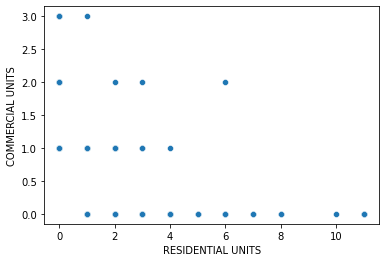

In [40]:
sns.scatterplot(data=df[(df['SALE PRICE']<50000000) & (df['SALE PRICE'] > 1000) 
                        & (df["LAND SQUARE FEET"]< df["GROSS SQUARE FEET"])
                        & (df["GROSS SQUARE FEET"]<2350)
                        & (df["GROSS SQUARE FEET"]>120)
                        & (df["COMMERCIAL UNITS"]<500)
                        & (df["RESIDENTIAL UNITS"]<500)], x="RESIDENTIAL UNITS", y="COMMERCIAL UNITS")


Used filtering by defined threshold method to remove the outliers.

In [41]:
df_new=df[(df['SALE PRICE']<5000000) & (df['SALE PRICE'] > 1000) 
                        & (df["LAND SQUARE FEET"]< df["GROSS SQUARE FEET"])
                        & (df["GROSS SQUARE FEET"]<2350)
                        & (df["GROSS SQUARE FEET"]>120)
                        & (df["COMMERCIAL UNITS"]<500)
                        & (df["RESIDENTIAL UNITS"]<500)]

In [42]:
df_new.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING AGE,BUILDING CATEGORY
58,Manhattan,CHINATOWN,22 STORE BUILDINGS,4,162,47,K4,10-14 DOYERS STREET,,10013,1,3,4.0,892.0,1784.0,1920.0,4,K4,3000000.0,2017-07-31,102,Pre-War
172,Manhattan,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,585,69,A5,2 GROVE COURT,,10014,1,0,1.0,384.0,1152.0,1901.0,1,A5,1375000.0,2016-10-07,121,Pre-War
173,Manhattan,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,585,69,A5,2 GROVE COURT,,10014,1,0,1.0,384.0,1152.0,1901.0,1,A5,1375000.0,2016-10-07,121,Pre-War
174,Manhattan,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,606,28,S1,66 GREENWICH AVENUE,,10011,1,1,2.0,925.0,2337.0,1910.0,1,S1,4065000.0,2017-08-03,112,Pre-War
234,Manhattan,HARLEM-CENTRAL,02 TWO FAMILY DWELLINGS,1,1950,7,B3,357 WEST 123 STREET,,10027,2,0,2.0,1598.0,2340.0,1899.0,1,B3,2460000.0,2017-05-17,123,Pre-War


### Visualization of categorical features using box plot

In [43]:
df_new.select_dtypes(['category']).columns

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'ADDRESS',
       'APARTMENT NUMBER', 'ZIP CODE', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'BUILDING CATEGORY'],
      dtype='object')

In [44]:
sorted(df['TAX CLASS AT PRESENT'].unique())

['1', '2', '2A', '2B', '2C', '4']

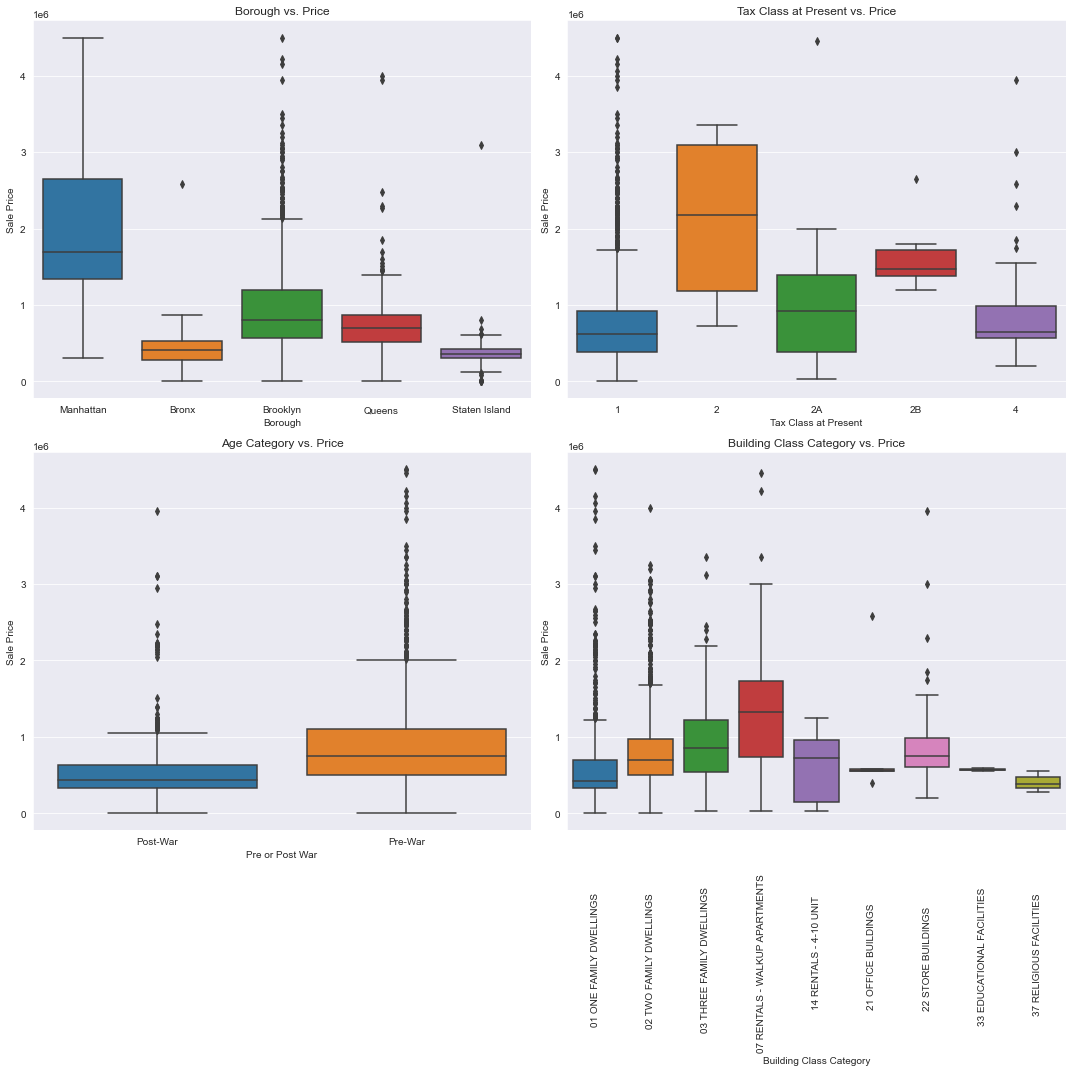

In [45]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(2,2, figsize = (15,15))

sns.boxplot(x = 'BOROUGH', y = 'SALE PRICE', data = df_new, ax = axes[0,0])
axes[0,0].set_xlabel('Borough')
axes[0,0].set_ylabel('Sale Price')
axes[0,0].set_title('Borough vs. Price')

order_tax = sorted(df_new['TAX CLASS AT PRESENT'].unique())
sns.boxplot(x = 'TAX CLASS AT PRESENT', y = 'SALE PRICE', data = df_new, ax = axes[0,1], order = order_tax)
axes[0,1].set_xlabel('Tax Class at Present')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('Tax Class at Present vs. Price')


sns.boxplot(x = 'BUILDING CATEGORY', y = 'SALE PRICE', data = df_new, ax = axes[1,0])
axes[1,0].set_xlabel('Pre or Post War')
axes[1,0].set_ylabel('Sale Price')
axes[1,0].set_title('Age Category vs. Price')

order_class = sorted(df_new['BUILDING CLASS CATEGORY'].unique())
sns.boxplot(x = 'BUILDING CLASS CATEGORY', y = 'SALE PRICE', data = df_new, ax = axes[1,1], order = order_class)
axes[1,1].set_xlabel('Building Class Category')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('Building Class Category vs. Price')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


## Drop Duplicates

In [46]:
len(df_new)

2265

In [47]:
df_new.drop_duplicates()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING AGE,BUILDING CATEGORY
58,Manhattan,CHINATOWN,22 STORE BUILDINGS,4,162,47,K4,10-14 DOYERS STREET,,10013,1,3,4.0,892.0,1784.0,1920.0,4,K4,3000000.0,2017-07-31,102,Pre-War
172,Manhattan,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,585,69,A5,2 GROVE COURT,,10014,1,0,1.0,384.0,1152.0,1901.0,1,A5,1375000.0,2016-10-07,121,Pre-War
174,Manhattan,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,606,28,S1,66 GREENWICH AVENUE,,10011,1,1,2.0,925.0,2337.0,1910.0,1,S1,4065000.0,2017-08-03,112,Pre-War
234,Manhattan,HARLEM-CENTRAL,02 TWO FAMILY DWELLINGS,1,1950,7,B3,357 WEST 123 STREET,,10027,2,0,2.0,1598.0,2340.0,1899.0,1,B3,2460000.0,2017-05-17,123,Pre-War
258,Manhattan,HARLEM-CENTRAL,07 RENTALS - WALKUP APARTMENTS,2A,1726,22,C3,35 WEST 128 STREET,,10027,4,0,4.0,1249.0,2058.0,1910.0,2,C3,1431326.0,2017-08-07,112,Pre-War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29274,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,226,A5,19 PEMBROOK LOOP,,10309,1,0,1.0,1616.0,2137.0,1992.0,1,A5,417500.0,2016-11-15,30,Post-War
29275,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,246,A5,61 PEMBROOK LOOP,,10309,1,0,1.0,1428.0,2206.0,1992.0,1,A5,470000.0,2017-05-04,30,Post-War
29276,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,280,A5,131 PEMBROOK LOOP,,10309,1,0,1.0,1669.0,1828.0,1993.0,1,A5,425000.0,2017-07-10,29,Post-War
29277,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,311,A5,203 PEMBROOK LOOP,,10309,1,0,1.0,1360.0,1672.0,1992.0,1,A5,354000.0,2016-09-12,30,Post-War


# Data Exploration

In [48]:
pd.set_option('float_format', '{:,.2f}'.format)

## Question1:  Which month has the maximize likelihood of customer's buying property? Which month had the highest total amount of property sales?

In [49]:
print('Sales Dated from {} to {}'.format(df_new['SALE DATE'].min(), df_new['SALE DATE'].max()))

Sales Dated from 2016-09-01 00:00:00 to 2017-08-30 00:00:00


In [50]:
df_new.groupby(df_new['SALE DATE'].dt.month).sum()['SALE PRICE']

SALE DATE
1    156,927,708.00
2    149,764,529.00
3    149,176,351.00
4    130,043,226.00
5    187,489,189.00
6    168,886,654.00
7    132,618,760.00
8    111,501,216.00
9    137,480,119.00
10   115,427,647.00
11   125,432,117.00
12   159,135,291.00
Name: SALE PRICE, dtype: float64

In [51]:
df_new.groupby(df_new['SALE DATE'].dt.month).count().iloc[:,0]

SALE DATE
1     212
2     186
3     202
4     178
5     218
6     230
7     165
8     116
9     204
10    162
11    176
12    216
Name: BOROUGH, dtype: int64

<ipython-input-54-3dd00e3f70dd>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


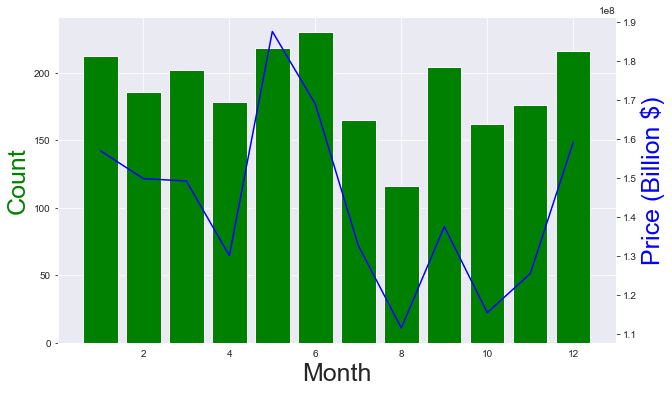

In [54]:
months = [x for x, df in df_new.groupby(df_new['SALE DATE'].dt.month)]
count = df_new.groupby(df_new['SALE DATE'].dt.month).count().iloc[:,0]
prices = df_new.groupby(df_new['SALE DATE'].dt.month).sum()['SALE PRICE']

fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
ax1.bar(months, count, color='g')
ax2.plot(months, prices, color='b')

ax1.set_xlabel('Month',fontsize=25)
ax1.set_ylabel('Count', color='g', fontsize=25)
ax2.set_ylabel('Price (Billion $)', color='b', fontsize=25)
plt.grid()
fig.show()

## Question 2: Which Borough sold the most property?

In [60]:
df_new.groupby(df_new['BOROUGH']).count().iloc[:,0].index

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object', name='BOROUGH')

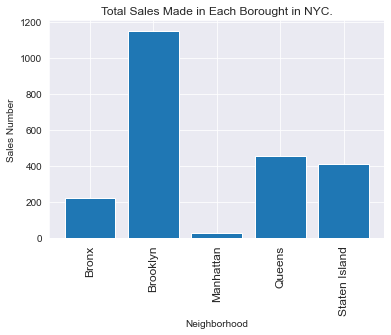

In [62]:
keys = df_new.groupby(df_new['BOROUGH']).count().iloc[:,0].index

plt.bar(keys, df_new.groupby(df_new['BOROUGH']).count().iloc[:,0])
plt.ylabel('Sales Number')
plt.xlabel('Neighborhood')
plt.xticks(keys, rotation='vertical', size=12)
plt.title('Total Sales Made in Each Borought in NYC.')
plt.show()

## Question 3: What type of unit sold the most? Residential Unit VS Commercial Unit

In [80]:
df_new.groupby(df_new['BOROUGH']=='Bronx').sum()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BUILDING AGE
BOROUGH,,,,,,,,
False,3604,176,"3,778.00","3,174,836.00","3,864,451.00","3,963,209.00","1,631,115,916.00",165715
True,387,12,399.00,"355,999.00","429,424.00","432,820.00","92,766,891.00",18086


In [85]:
df_new.groupby(df_new['BOROUGH']=='Bronx').sum().iloc[1,0:2]

RESIDENTIAL UNITS   387.00
COMMERCIAL UNITS     12.00
Name: True, dtype: float64

In [87]:
table= pd.DataFrame(columns=['RESIDENTIAL UNITS', 'COMMERCIAL UNITS'])
for x in keys:
    t = pd.DataFrame(df_new.groupby(df_new['BOROUGH']==x).sum().iloc[1,0:2])
    t.columns=[x]
    t = t.T
    table = table.append(t)
table 

,RESIDENTIAL UNITS,COMMERCIAL UNITS
Bronx,387.00,12.00
Brooklyn,"2,206.00",95.00
Manhattan,121.00,6.00
Queens,832.00,63.00
Staten Island,445.00,12.00


In [91]:
table.index

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object')

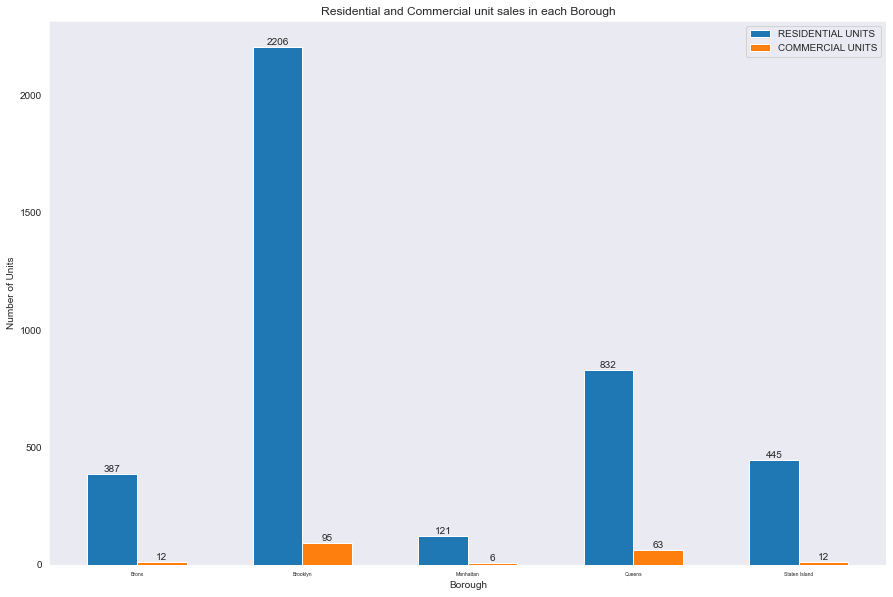

In [94]:
N=5

blue_bar = table['RESIDENTIAL UNITS']
orange_bar = table['COMMERCIAL UNITS']

ind=np.arange(N)

fig, ax = plt.subplots(figsize=(15,10))

width = 0.3
p1=ax.bar(ind, blue_bar, width, label='RESIDENTIAL UNITS')
p2=ax.bar(ind+width, orange_bar, width, label='COMMERCIAL UNITS')

plt.xlabel('Borough')
plt.ylabel('Number of Units')
plt.title('Residential and Commercial unit sales in each Borough')

plt.xticks(ind + width / 2, ('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'), size=5)

ax.bar_label(p1)
ax.bar_label(p2)

plt.grid(color='grey',linestyle='--')
plt.legend(loc='best')
plt.show()


## Which are the most expensive neighborhood in NYC?

In [170]:
np.mean(df_new['SALE PRICE'][df_new.NEIGHBORHOOD == 'MURRAY HILL'])

3250000.0

In [186]:
df_new.groupby(df_new['NEIGHBORHOOD']).mean().sort_values('SALE PRICE', ascending=False)

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BUILDING AGE
NEIGHBORHOOD,,,,,,,,
UPPER EAST SIDE (79-96),3.00,0.00,3.00,"1,193.50","1,980.00","1,904.50","4,472,500.00",117.50
MURRAY HILL,1.00,0.00,1.00,493.00,"1,872.00","1,910.00","3,250,000.00",112.00
BROOKLYN HEIGHTS,1.20,0.00,1.20,"1,116.40","1,877.00","1,909.20","3,215,000.00",112.80
COBBLE HILL,1.60,0.00,1.60,"1,272.20","1,879.60","1,899.80","3,203,000.00",122.20
CHINATOWN,1.00,3.00,4.00,892.00,"1,784.00","1,920.00","3,000,000.00",102.00
...,...,...,...,...,...,...,...,...
UPPER WEST SIDE (79-96),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UPPER WEST SIDE (96-116),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VAN CORTLANDT PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
temp=pd.DataFrame(df_new.groupby(df_new['NEIGHBORHOOD']).mean()['SALE PRICE'].nlargest(n=20))

/Users/bayarjargalbatjargal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Average Property Price in the Top 20 Neighborhoods')

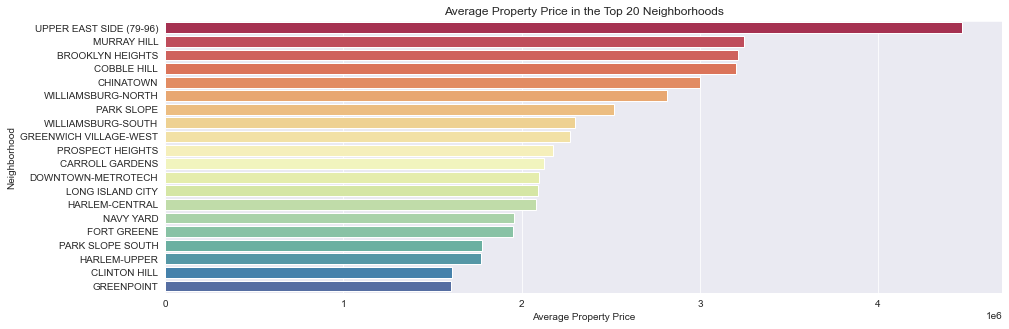

In [188]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x,y,data=temp, orient='h', ci=None, palette = "Spectral")
ax.set_xlabel('Average Property Price')
ax.set_ylabel('Neighborhood')
plt.title('Average Property Price in the Top 20 Neighborhoods')

# Data Analysis

## Distribution 

/Users/bayarjargalbatjargal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

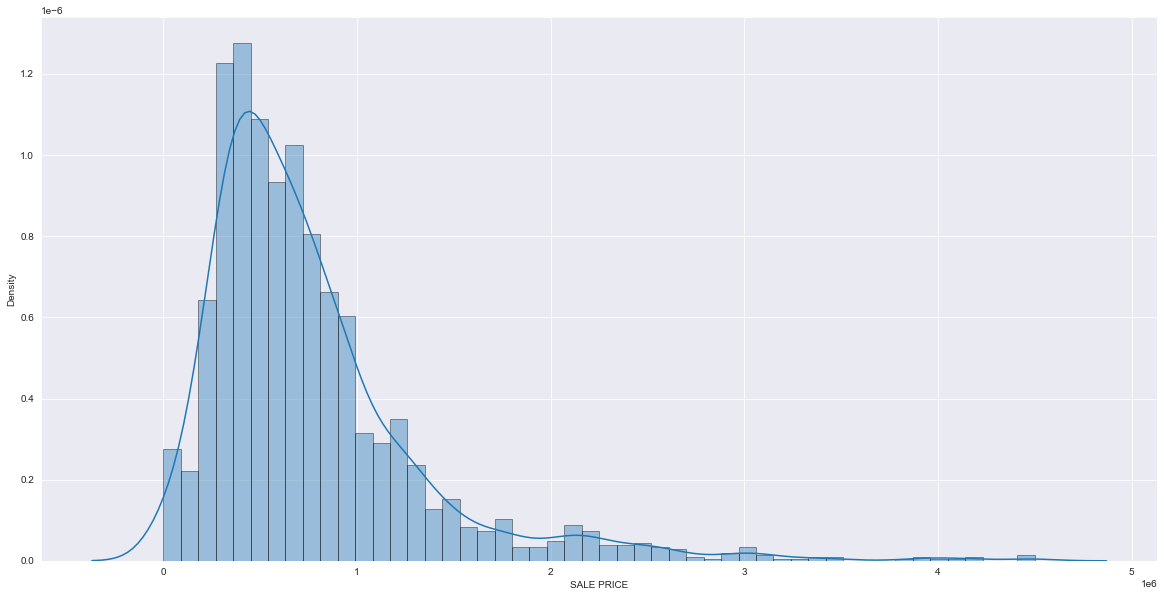

In [97]:
plt.figure(figsize = (20,10))
sns.distplot(df_new['SALE PRICE'], kde = True, hist_kws=dict(edgecolor="k"))

Sales Price attribute has a right skewed distribution 

## Sales Price Analysis vs numerical features

In [204]:
df_new.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE',
       'BUILDING AGE', 'BUILDING CATEGORY'],
      dtype='object')

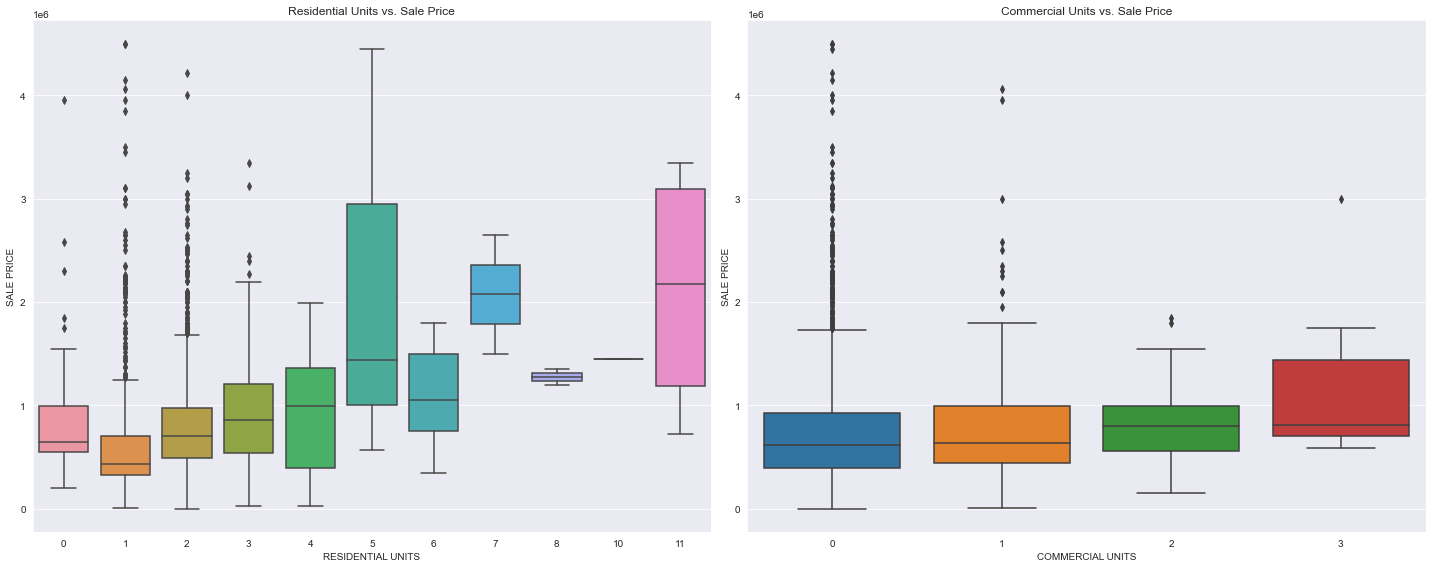

In [212]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1,2, figsize = (20,8))

sns.boxplot(x='RESIDENTIAL UNITS', y="SALE PRICE", data=df_new, ax = axes[0])
axes[0].set_title('Residential Units vs. Sale Price')

sns.boxplot(x ='COMMERCIAL UNITS', y ='SALE PRICE', data = df_new, ax = axes[1])
axes[1].set_title('Commercial Units vs. Sale Price')

plt.tight_layout()
plt.show()


## Correlation

In [213]:
corr=df_new.corr()

Text(0.5, 1.0, 'Variable Correlation')

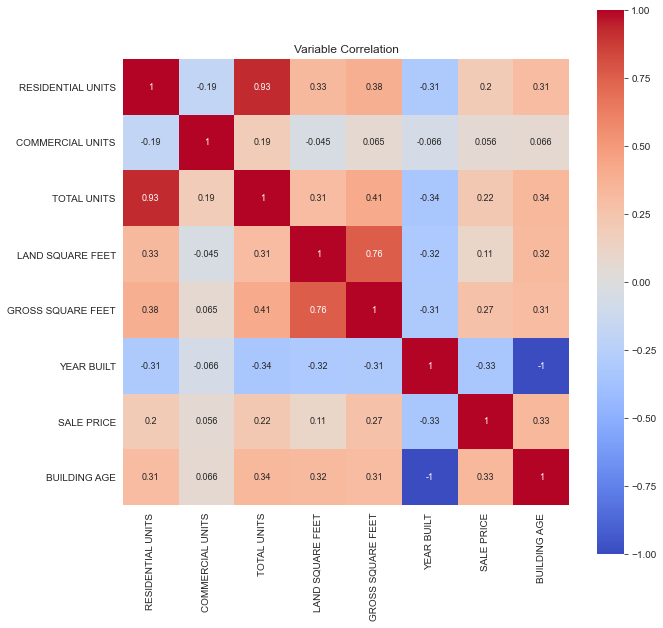

In [215]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap = 'coolwarm', square=True, annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')